In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Input, Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [5]:
num_classes = 10

In [6]:
def inception_block(n_1i, n_3i, n_3o,
                    n_5i, n_5o, n_7i, 
                    n_7o, n_mpi, x):
    outputs = []
    
    if n_1i:
        inp_layer_x1 = Conv2D(kernel_size=(1, 1), filters=n_1i, 
                              activation="relu", padding="same")(x)
        outputs.append(inp_layer_x1)
    
    if n_3i:
        inp_layer_x3 = Conv2D(kernel_size=(1, 1), filters=n_3i, padding="same")(x)
        x3_layer =  Conv2D(kernel_size=(3, 3), filters=n_3o, 
                           activation="relu", padding="same")(inp_layer_x3)
        outputs.append(x3_layer)
    
    if n_5i:
        inp_layer_x5 = Conv2D(kernel_size=(1, 1), filters=n_5i, padding="same")(x)
        x5_layer = Conv2D(kernel_size=(5, 5), filters=n_5o, 
                          activation="relu", padding="same")(inp_layer_x5)
        outputs.append(x5_layer)

    if n_7i:
        inp_layer_x7 = Conv2D(kernel_size=(1, 1), filters=n_7i, padding="same")(x)
        x7_layer = Conv2D(kernel_size=(7, 7), filters=n_7o, 
                          activation="relu", padding="same")(inp_layer_x7)
        outputs.append(x7_layer)
        
    if n_mpi:
        inp_layer_mp = Conv2D(kernel_size=(1, 1), filters=n_mpi, 
                              activation="relu", padding="same")(x)
        mp_layer = layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding="same")(inp_layer_mp)
        outputs.append(mp_layer)
        
    return keras.layers.Concatenate()(outputs)

In [26]:
input_layer = Input(shape=(300, 300, 3))
hidden_1 = Conv2D(kernel_size=(3, 3), filters=64, activation="relu")(input_layer)
hidden_2 = Conv2D(kernel_size=(5, 5), filters=128, activation="relu")(hidden_1)
hidden_2_2 = Conv2D(kernel_size=(5, 5), filters=128, activation="relu")(hidden_2)

max_pool_1 = layers.MaxPooling2D(pool_size=(2, 2))(hidden_2_2)
inception_1 = inception_block(n_1i=32, n_3i=32, n_3o=64, 
                              n_5i=32, n_5o=64, n_7i=0, 
                              n_7o=0, n_mpi=32, x=max_pool_1)

max_pool_2 = layers.MaxPooling2D(pool_size=(2, 2))(inception_1)
inception_2 = inception_block(n_1i=0, n_3i=0, n_3o=0, 
                              n_5i=32, n_5o=64, n_7i=32, 
                              n_7o=64, n_mpi=128, x=max_pool_2)
#max_pool_3 = layers.MaxPooling2D(pool_size=(2, 2))(inception_2)

inception_3 = inception_block(n_1i=64, n_3i=32, n_3o=64, 
                              n_5i=32, n_5o=64, n_7i=32, 
                              n_7o=64, n_mpi=64, x=inception_2)

hidden_3 = Conv2D(kernel_size=(1, 1), filters=128)(inception_2)
#max_pool_4 = layers.MaxPooling2D(pool_size=(2, 2))(hidden_3)

max_pool_throw = layers.MaxPooling2D(pool_size=(4, 4))(hidden_2_2)
inception_4 = inception_block(n_1i=32, n_3i=32, n_3o=64, 
                              n_5i=32, n_5o=64, n_7i=0, 
                              n_7o=0, n_mpi=32, x=layers.Concatenate()([max_pool_throw, hidden_3]))
#max_pool_5 = layers.MaxPooling2D(pool_size=(2, 2))(inception_4)
final_cnn = Conv2D(kernel_size=(1, 1), filters=20)(inception_4)

first_dense = Flatten()(final_cnn)
#dropout_layer_1 = Dropout(0.7)(first_dense)

fnn_hidden_1 = Dense(512, activation="relu")(first_dense)
fnn_hidden_2 = Dense(128, activation="relu")(fnn_hidden_1)
output_layer = Dense(num_classes, activation="softmax")(layers.Concatenate()([first_dense, fnn_hidden_2]))
cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_243 (Conv2D)             (None, 298, 298, 64) 1792        input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_244 (Conv2D)             (None, 294, 294, 128 204928      conv2d_243[0][0]                 
__________________________________________________________________________________________________
conv2d_245 (Conv2D)             (None, 290, 290, 128 409728      conv2d_244[0][0]                 
____________________________________________________________________________________________

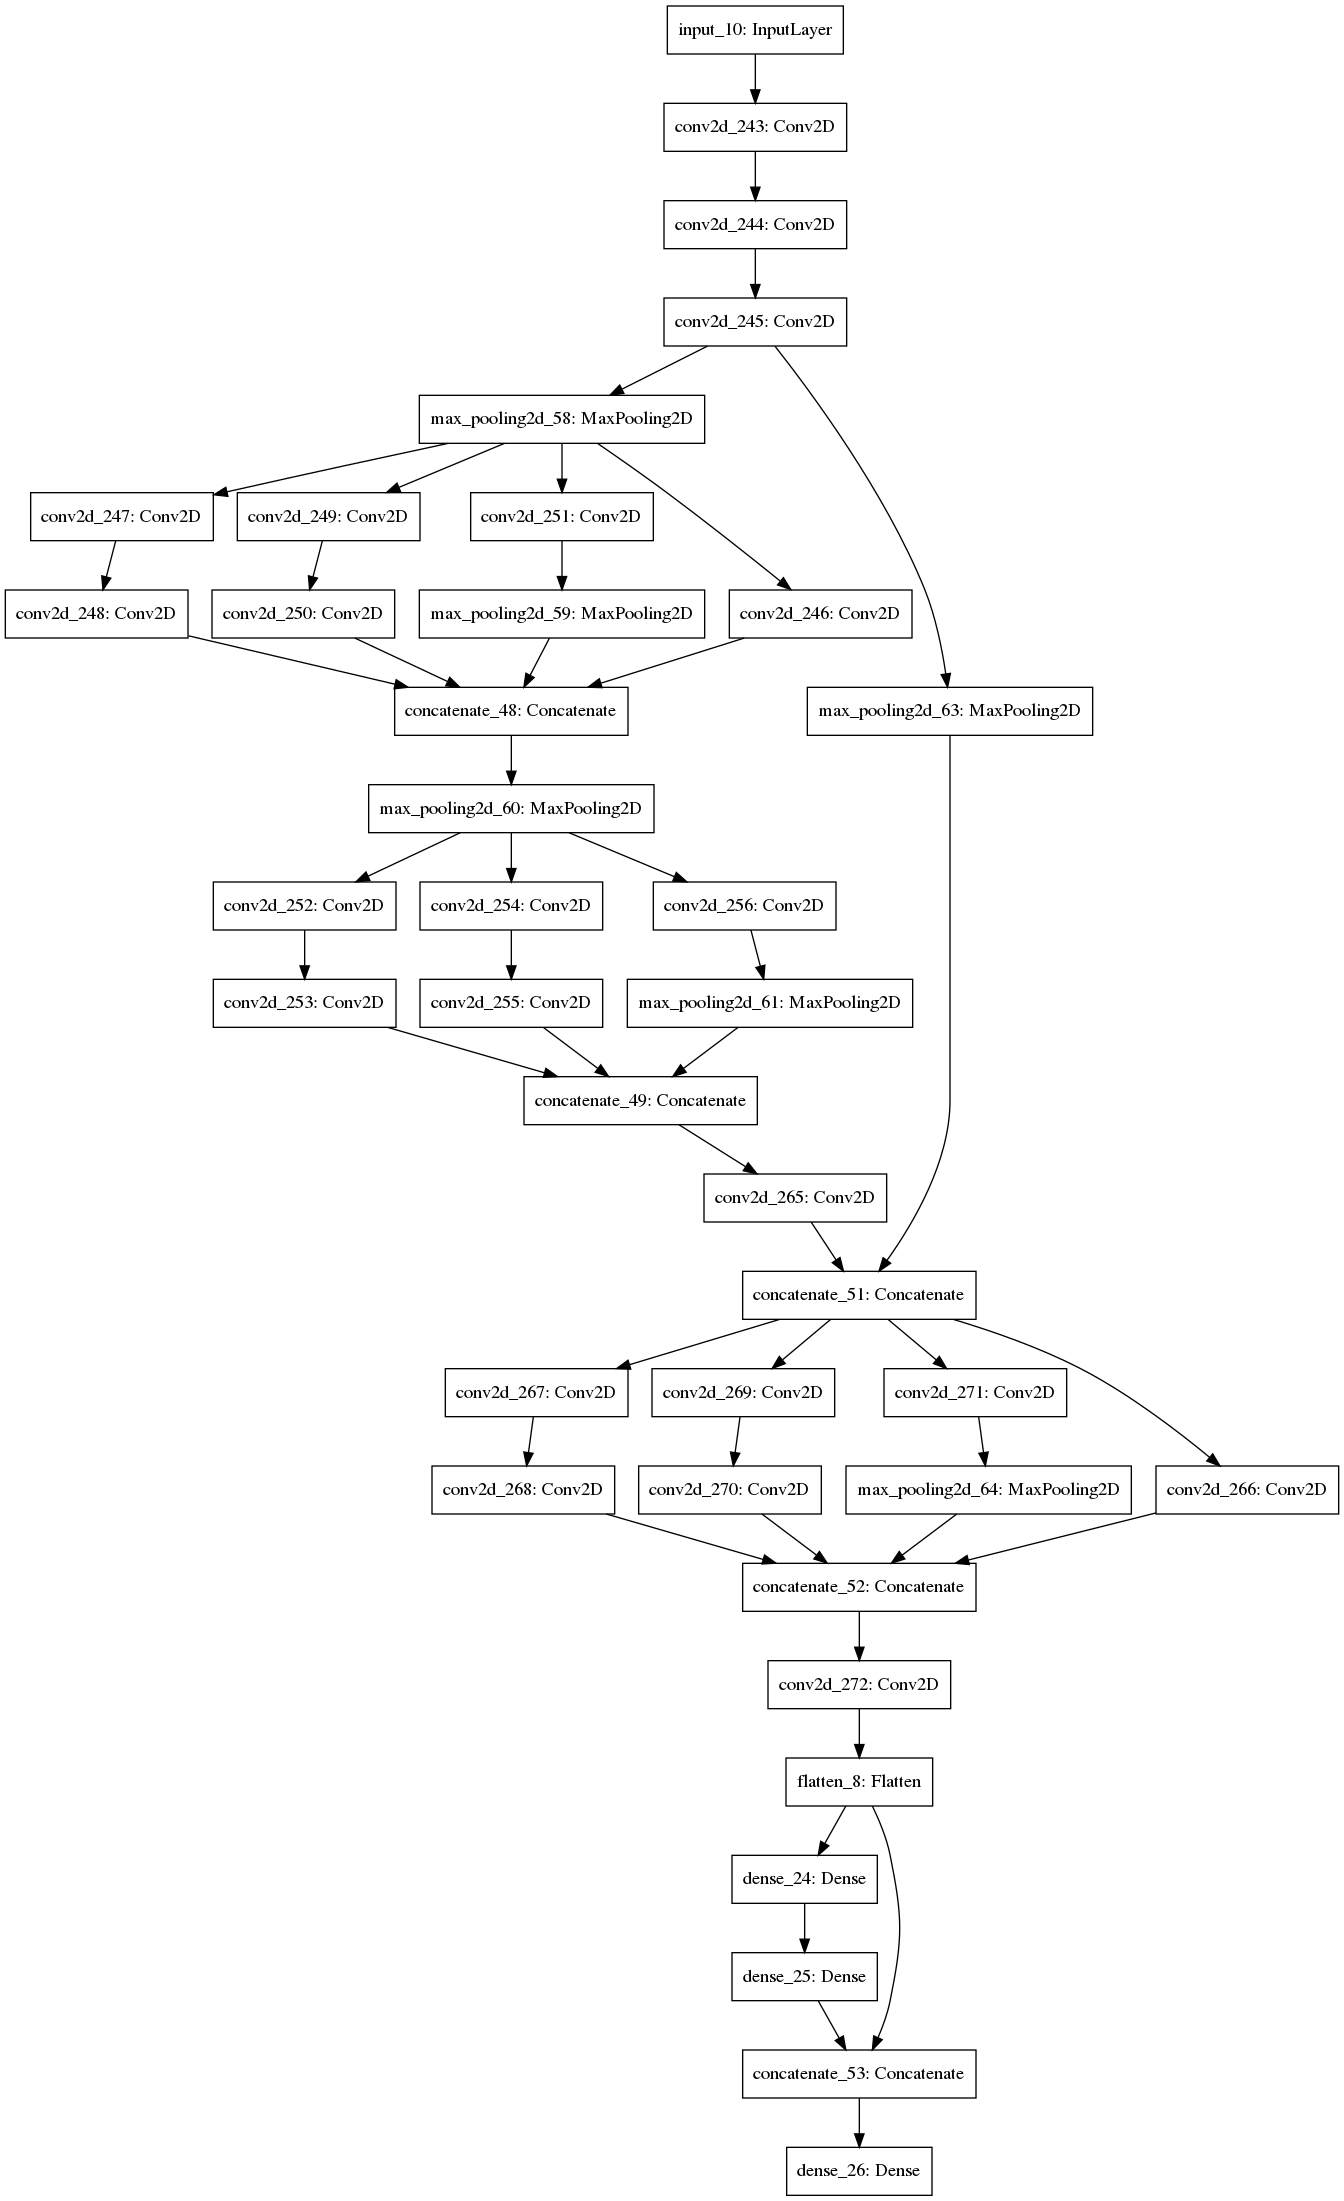

In [27]:
keras.utils.plot_model(cnn_model)

In [28]:
cnn_model.save("models/no_dropout")

INFO:tensorflow:Assets written to: models/no_dropout/assets
